### <center> 3. Корреляция

>**Корреляция** — статистическая связь двух и более переменных. При изменении значения одной из переменных происходит закономерное изменение другой или других величин. 

Мерой связи величин, мерой корреляции является **коэффициент корреляции**. Он может принимать значение от -1 до +1.

**Отрицательная корреляция**, коэффициент корреляции < 0 говорит об обратной связи между переменными. При обратной связи увеличение одной из величин ведёт к закономерному уменьшению другой (других) величин. 

**Положительная корреляция**, коэффициент корреляции > 0 говорит о прямой связи между переменными. При прямой связи увеличение одной из величин ведёт к закономерному увеличению другой (других) величин. 

**Коэффициент корреляции = 0** говорит о том, что переменные независимы друг от друга, по крайней мере линейно, но это вовсе не значит, что между ними нет какой-то более сложной взаимосвязи. Это достаточно редкое явление, которое может встретиться на конкретном наборе данных.

>Понимание корреляции приводит нас к понятию **мультиколлинеарности** — такой сильной зависимости переменных друг от друга, что она затрудняет анализ и оценку будущей модели машинного обучения. 

В таблице отражены основные силы связи между признаками.

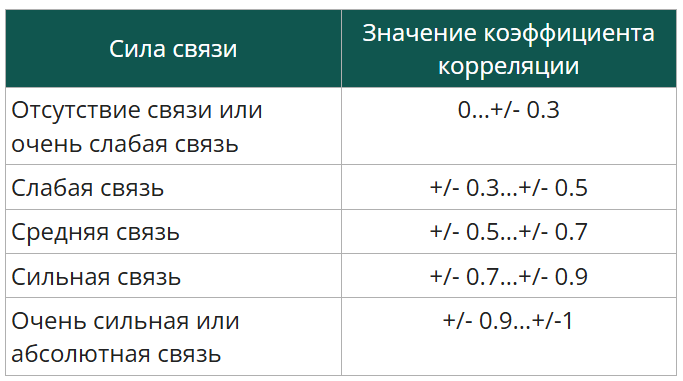

Принято считать, что при коэффициенте корреляции +/-0,7 связь между признаками сильная и приводит к мультиколлинеарности.

*>Например, сложилась ситуация, когда в датасете были обнаружены признаки с очень сильной корреляцией. Мы знаем, что мультиколлинеарность вредит такой модели, поэтому на этапе проектирования признаков можем объединить эту пару признаков в один или удалить из этой пары один — тот, что менее важен.*

Для расчёта коэффициента корреляции применим функцию `df.corr()` библиотеки *pandas*.

**Задание 3.3**

Вычислите коэффициент корреляции между переменными в датасете винных обзоров. В ответ запишите величину коэффициента корреляции между ценой за бутылку и баллами за вино. Округлите ответ до шести знаков после запятой.

In [1]:
import pandas as pd
import statistics
data = pd.read_csv('data/wine_cleared.csv')

In [2]:
corr_df = round(data['price'].corr(data['points']), 6)
corr_df

np.float64(0.402137)

Результатом функции `df.corr()` является матрица корреляции.

>**Матрица корреляции** — таблица, заголовками и строками которой являются названия признаков в датасете. На пересечении строк и столбцов находится значение коэффициента корреляции этих двух признаков.

Данная матрица имеет значение 1 по главной диагонали, так как единица означает корреляцию признака с самим собой. Матрица является **симметричной**. 

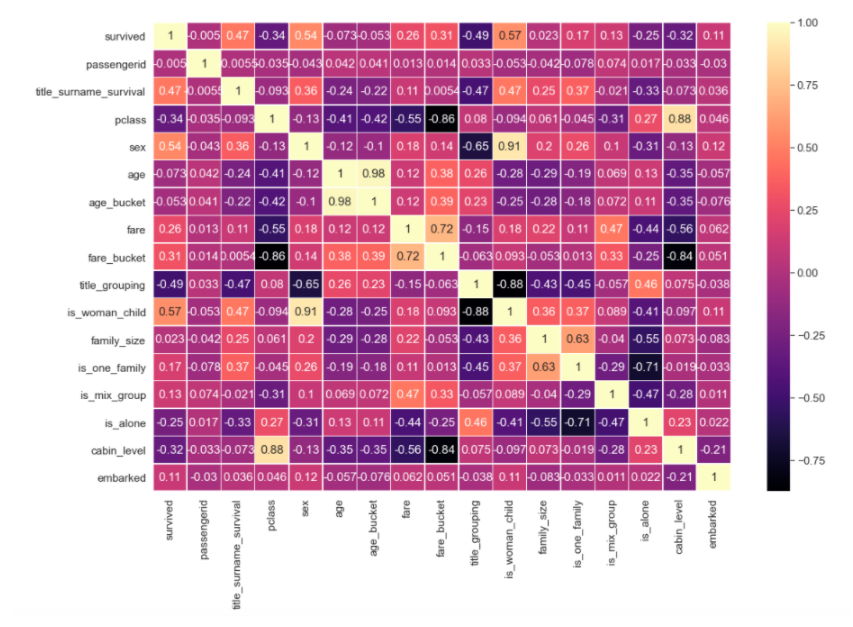

<center> *Визуализация матрицы корреляций на примере датасета о пассажирах «Титаника». Источник: kaggle*

Рассчитать коэффициент корреляции мы можем только в том случае, когда признак имеет **численное** выражение. Для расчета коэффициента корреляции строковых значений необходимо провести кодирование признака.

*Корреляция и причинно-следственная связь* — это понятия, которые чаще всего ошибочно приравниваются друг к другу. Понимание корреляции важно для разведывательного анализа и помогает делать правильные выводы. 

**ЛОЖНАЯ КОРРЕЛЯЦИЯ**

**Продажи мороженого коррелируют с убийствами!**

По мере роста или падения продаж замороженного десерта соответственно растёт или уменьшается количество убийств. Является ли потребление замороженного десерта причиной смерти людей?

В некоторых случаях участвуют скрытые факторы. Например, в примере с мороженым улучшение погоды вызывает рост продаж десерта, а большое количество людей на улицах создаёт благоприятные условия для убийц.

Нет причинно-следственной связи между убийствами и продажей мороженого, а наличие третьего фактора — хорошей погоды — объясняет эти связи. Этот случай называется **ложной корреляцией**.

Существует огромное количество подобных исследований с удивительными связями. Прочитайте, например, [про связь пиратов с глобальным потеплением](https://ru.wikipedia.org/wiki/Пастафарианство#Пираты_и_глобальное_потепление). Больше исследований вы найдёте [здесь](http://www.tylervigen.com/spurious-correlations).

### <center>  4. Типы корреляций. Корреляция Пирсона

→ Аргумент `method` в `pd.corr()` указывает на название используемого метода расчёта корреляции: `'pearson'` — корреляция Пирсона, `'kendall'` — корреляция Кендалла, `'spearman'` — корреляция Спирмена. Каждый метод может быть применён для разных типов данных. Давайте разберёмся, чем отличаются эти методы и для каких типов данных применять каждый из них.

>**Коэффициент корреляции Пирсона** используется для вычисления линейной взаимосвязи между признаками. 

>**Линейная взаимосвязь** — вид связи между признаками, в котором изменение одного признака $x_1$ всегда приводит к изменению другого признака $x_2$ на величину, пропорциональную изменению $x_1$, в соответствии с правилом: $x_2 = ax_1 + b$ (уравнение прямой), где $a$ и $b$ — некоторые коэффициенты.

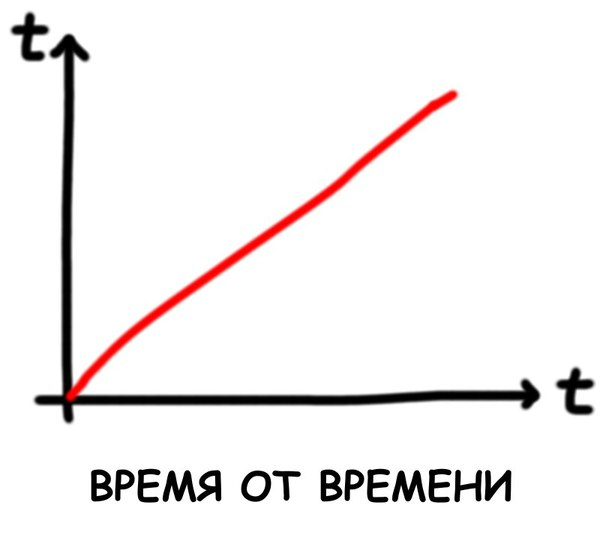

Определить существование линейной связи в паре признаков эмпирическим путем можно, если вы можете формулировать фразу про признаки: *«С уменьшением/увеличением признака 1 уменьшается/увеличивается признак 2 в соответствии с некоторым уравнением прямой»*. 

→ Более точной является **визуализация зависимости признаков.**

Для большинства непрерывных признаков это подходящий метод вычисления коэффициента корреляции. Однако при его использовании вы предполагаете, что признаки приблизительно нормально распределены и не имеют выбросов.

**НОРМАЛЬНОЕ РАСПРЕДЕЛЕНИЕ**

Большинство окружающих нас процессов и явлений, характеристик объектов можно описать **нормальным распределением**. В основном это переменные, которые зависят от множества факторов, например рост человека.

>Если признак является совокупностью **очень редких событий**, например аварии на дорогах, то распределение признака нормальным не будет.

С точки зрения визуализации нормальное (**гауссово**) распределение представляет собой распределение признака в виде колокола.

Нормальность распределения признака можно определить визуально, построив гистограмму распределения непрерывного признака или так называемый **q-q plot**. Подробнее о принципе построения данного графика советуем прочитать [здесь](https://habr.com/ru/post/578754/).

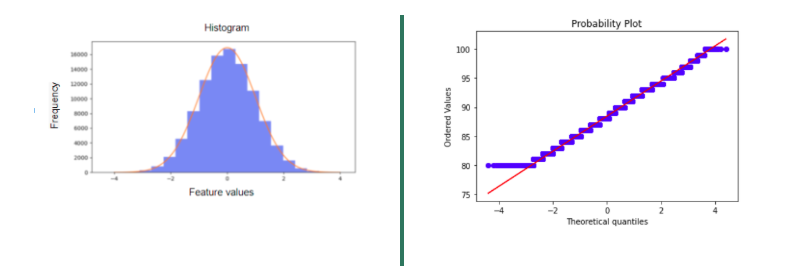

<center> Cхематичное изображение нормального распределения, график q-q plot.

На гистограмме распределение должно напоминать колокол (левый график на рисунке), а q-q plot должен напоминать прямую линию (правый график на рисунке).

→ Проверим наши данные винных обзоров на нормальность, используя метод визуализации.

Для этого воспользуемся пакетом [stats](https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats) статистических распределений и функций, а также знакомой нам библиотекой *matplotlib* для построения графиков.

Код для построения графиков:

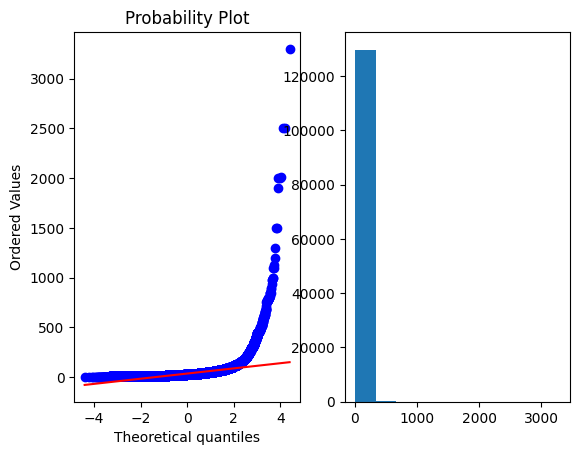

In [3]:
import matplotlib.pyplot as plt
from scipy import stats # Библиотека для расчетов

# Задаем сетку рисунка, количество строк и столбцов
plt.subplot(1, 2, 1) 
# qq plot
stats.probplot(data['price'], plot=plt)

# Располагаем второй рисунок рядом
plt.subplot(1, 2, 2)
# Гистрограмма распределения признака
plt. hist(data['price'])

# Чтобы графики не наезжали друг на друга, исползуем tight_layout
plt.tight_layout

# Просмотр графика
plt.show()

Кажется, признак распределён ненормально, так как q-q plot имеет изогнутую линию, а гистограмма распределения совершенно не похожа на колокол.

Такой признак при анализе Пирсоном может выдать некорректные результаты. Для таких случаев существуют другие виды корреляций или проводится операция по приведению признака к нормальному путём преобразований.

**Задание 4.2**

Постройте приведённые выше графики для признака *points* из датасета винных обзоров и выберите верное утверждение

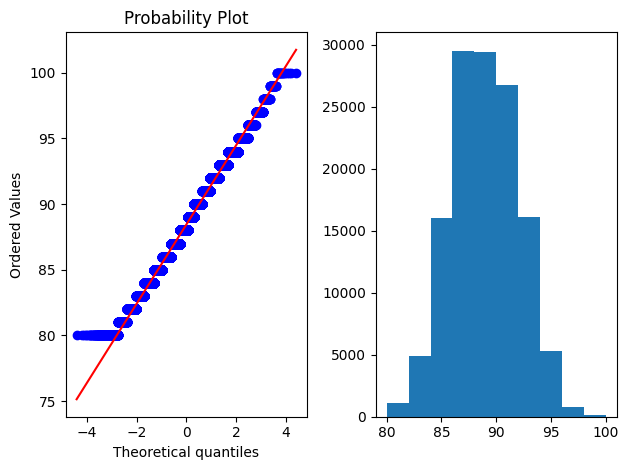

In [4]:
plt.subplot(1, 2, 1)
stats.probplot(data['points'], plot=plt)

plt.subplot(1, 2, 2)
plt.hist(data['points'])

plt.tight_layout()

plt.show()

### <center> 5. Типы корреляций. Ранговые корреляции

>**Ранговая корреляция** — это вид корреляции, отражающий отношения переменных, упорядоченных по возрастанию их значения. **Ранги** — это порядковые номера единиц совокупности в упорядоченном (ранжированном) ряду. Если проранжировать совокупность по двум признакам, связь между которыми изучается, то полное совпадение рангов означает максимально тесную **прямую связь**, а полная противоположность рангов — максимально тесную **обратную связь**.

##### <center> КОРРЕЛЯЦИЯ СПИРМЕНА

**Коэффициент корреляции Спирмена** используется для вычисления взаимосвязей между категориальными переменными.

Чтобы рассчитать коэффициент корреляции Спирмена, вам необходимо передать в `df.corr()` аргумент *method = 'spearman'*

**Задание 5.1**

Рассчитайте коэффициент корреляции Спирмена для признаков `point` и `price`. Ответ округлите до сотых.

In [5]:
spearman = round(data['price'].corr(data['points'], method='spearman'), 2)
spearman

np.float64(0.58)

Иногда мы можем применить ранговую корреляцию и для числовых переменных, которые распределены ненормально или если между ними существует нелинейная связь. 

>Лучшим вариантом будет придерживаться правил корреляций каждого из методов: для непрерывных нормально распределённых используем корреляцию Пирсона, для категориальных — ранговую. Однако в спорных случаях мы рассматриваем несколько вариантов корреляций

*>Например, в нашем случае один из признаков price распределён ненормально, связь между ними также не является линейной. Корреляция по Пирсону составляет 0.4, что говорит о слабой связи признаков. А корреляция по Спирмену составляет 0.58, что говорит о более сильной связи.*

Для ранговой корреляции существует ещё один метод расчёта — корреляция Кендалла.

##### <center> КОРРЕЛЯЦИЯ КЕНДАЛЛА

Так же, как и корреляция Спирмена, корреляция Кендала предусмотрена для нахождения взаимосвязей между *категориальными* переменными. Для расчёта коэффициента корреляции Кендалла необходимо передать в изученный нами метод `df.corr()` аргумент *method = 'kendall'*. 

**Задание 5.2**

Рассчитайте коэффициент корреляции Кендалла для признаков `point` и `price`. Ответ округлите до сотых.

In [6]:
kend = round(data['points'].corr(data['price'], method='kendall'), 2)
kend

np.float64(0.43)

**Корреляция Кендалла более устойчива к ошибкам и выбросам в данных**. Это значит, что *её можно применить до очистки данных*, чтобы выявить взаимосвязи заранее. Применение в этом случае корреляции Спирмена, как и корреляции Пирсона, не вызовет ошибки, но, скорее всего, некорректность расчёта приведёт к неверным выводам.

*>В нашем случае корреляционный анализ показал нам явную связь цены за бутылку вина с её рейтингом. Она не является такой сильной связью, чтобы вызывать мультиколлинеарность. Также мы по-прежнему не можем сказать, что цена и рейтинг связаны напрямую, ведь корреляция не даёт нам причинно-следственных связей. Возможно, есть третья переменная, влияющая на эти оба признака.*

Даже такой грубый анализ без учёта всех условий для корреляций может быть полезен и позволяет сделать предварительные выводы для дальнейшей работы с признаками

##### <center> КОРРЕЛЯЦИЯ МЭТЬЮСА

Бинарные признаки являются подгруппой категориальных. Мы по-прежнему можем использовать методы ранговых корреляций для расчёта связи между переменными. 

>Кроме этого, существует **корреляция Мэтьюса** — мера силы связи между бинарными переменными.

Для расчета корреляции Мэтьюса, но мы можем воспользоваться библиотекой *scikit-learn* и её функцией `matthews_corrcoef()` для расчёта коэффициента корреляции Мэтьюса.

>*scikit-learn* — это библиотека с реализацией готовых алгоритмов для машинного обучения.

Для начала установим библиотеку *scikit-learn*.

```py
pip install scikit-learn
```
Затем импортируем нужную нам функцию для дальнейшей работы.

In [7]:
from sklearn.metrics import matthews_corrcoef

**Пример.** Создадим два случайных признака *x*, *y* и зададим им бинарные значения.

In [8]:
x = [+1, -1, +1, +1] # Список значений признака x
y = [+1, +1, +1, -1] # Список значений признака y

# Рассчитаем коэффициент корреляции Мэтьюса
matthews_corrcoef(x, y) 

-0.3333333333333333

Коэффициент корреляции Мэтьюса может быть полезен в случае, **когда в датасете представлены только бинарные переменные.** Кроме того, этот коэффициент используется для оценки качества моделей, ответы которых также бинарны. 

*>Например, при предсказании дефолтности клиента у нас может быть только два исхода: 1 — дефолт, 0 — не дефолт.*

### <center>  6. Визуализация корреляций. Матрица корреляций. График рассеивания. Парные отношения в наборе данных

In [9]:
df = pd.read_csv('data/model.csv')
df.head()

,Month,Year,Waist,Hips,Height,Weight,BMI,Waist/Hip
0,December,1953,24.000000,36.000000,65.000000,118.000000,19.630000,0.670000
1,January,1954,23.433172,34.698708,66.057258,114.936066,18.232168,0.677916
2,February,1954,23.433172,34.698708,66.057258,114.936066,18.232168,0.677916
3,March,1954,24.000000,35.000000,66.000000,118.000000,19.040000,0.690000
4,April,1954,23.433172,34.698708,66.057258,114.936066,18.232168,0.677916


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Month      662 non-null    object 
 1   Year       662 non-null    int64  
 2   Waist      662 non-null    float64
 3   Hips       662 non-null    float64
 4   Height     662 non-null    float64
 5   Weight     662 non-null    float64
 6   BMI        662 non-null    float64
 7   Waist/Hip  662 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 41.5+ KB


Набор данных содержит ~600 записей о девушках и восемь признаков:

- `BMI` — индекс массы тела (ИМТ)
- `year` — год размещения модели в журнале
- `month` — месяц размещения
- `waist` — обхват талии модели
- `hips` — обхват бёдер модели
- `height` — рост модели
- `weight` — вес модели
- `waist/hip` — соотношение обхвата талии и бёдер

**МАТРИЦА КОРРЕЛЯЦИЙ**

В случае большого количества данных в датасете матрица, возвращаемая методом *pandas* `data.corr()`, становится нечитаемой.

**Задание 6.1**

Постройте матрицу корреляций для датасета. В ответ впишите самый высокий коэффициент корреляции. Ответ округлите до сотых.

In [10]:
# Построение матрицы корреляции
corr_matrix = round(df['Waist'].corr(df['Waist/Hip']), 2)
corr_matrix


np.float64(0.74)

Cпециалисты по данным отдают предпочтение методам визуализации. Один из таких — **тепловая матрица корреляций.**

**ТЕПЛОВАЯ МАТРИЦА КОРРЕЛЯЦИЙ**

Для построения такой матрицы нам будет необходима знакомая нам из модуля по визуализации библиотека **seaborn**.

Импортируем библиотеку для дальнейшего использования:

In [11]:
import seaborn as sns

Для построения тепловой матрицы корреляций мы воспользуемся методом `sns.heatmap()` библиотеки *seaborn*. 

Метод принимает на вход двумерный массив данных под аргументом `data`. Это может быть матрица корреляций, полученная методом `df.corr()`, матрица пропущенных значений, полученная методом `df.isnull()`, набор данных и многое другое. 

Передадим в метод `heatmap()` нашу матрицу корреляций `corr()` (параметр `numeric_only=True` игнорирует нечисловые значения):

<Axes: >

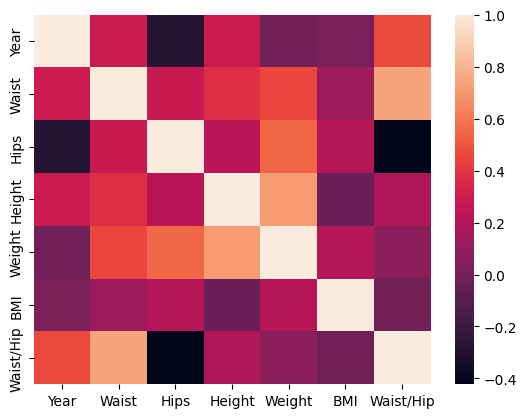

In [12]:
sns.heatmap(df.corr(numeric_only=True))

Чтобы было удобнее её интерпретировать, передадим параметр `annot=True`, чтобы отобразить коэффициент корреляции на пересечении признаков.

<Axes: >

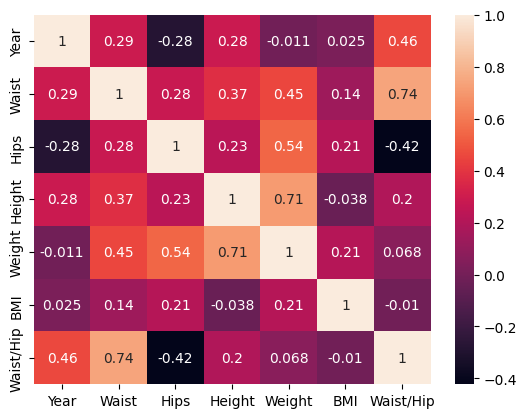

In [13]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

На горизонтальной и вертикальной осях располагаются названия признаков нашего датасета. По главной диагонали — единицы. Матрица *симметрична*. Справа от матрицы располагается тепловая шкала коэффициентов корреляции: от **минимума** -0.42 (это корреляция между признаками waist/hip + hips) и **максимума** по шкале — 1. 

Такую тепловую матрицу очень удобно интерпретировать: в тёплых *светлых* оттенках отражена *положительная* корреляция между признаками, в *тёмных* холодных — *отрицательная* корреляция. Например, самая большая отрицательная взаимосвязь составляет -0.42, а самая большая положительная — 0.74.

С помощью такой матрицы очень удобно оценивать *мультиколлинеарность* в данных, делать выводы о связях между признаками.

Также у метода `heatmap` имеется много аргументов, которые позволяют настроить цветовую гамму графика, управлять его элементами и отображением. Подробнее об этом вы прочтёте здесь: [Seaborn Heatmaps: 13 способов настроить визуализацию матрицы корреляции](https://datastart.ru/blog/read/seaborn-heatmaps-13-sposobov-nastroit-vizualizaciyu-matricy-korrelyacii)

**SCATTERPLOT**

Чтобы рассмотреть распределение и характер связи, существует **точечная диаграмма рассеивания.**

>**Точечная диаграмма рассеивания** — это такая диаграмма, в которой каждое значение, которое принимает признак в датасете, отражено точкой.

Подобная диаграмма помогает установить характер и силу связи признаков. Сила связи *(коэффициент корреляции) зависит от того, насколько плотно расположены точки на диаграмме.*

Возьмём для примера две пары признаков:

- по оси *x="Waist/Hip"* — соотношение обхвата талии/бедер, по оси *y="Waist"* — обхват талии;
- по оси *x="Weight"* — вес модели, а по оси *y="Year"* — год размещения модели в журнале.

Построим для них точечную диаграмму:

<Axes: xlabel='Waist/Hip', ylabel='Waist'>

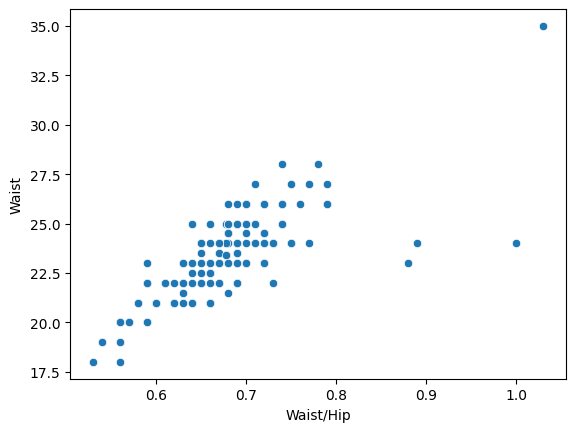

In [15]:
sns.scatterplot(data=df, x='Waist/Hip', y='Waist')

Построим диаграмму для следующей пары признаков и сравним их.

<Axes: xlabel='Weight', ylabel='Year'>

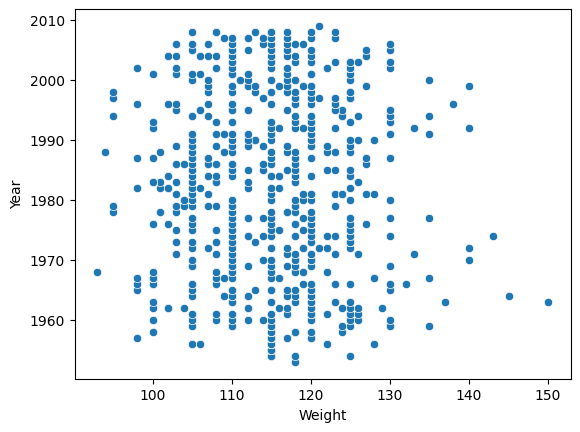

In [16]:
sns.scatterplot(
    data=df,
    x='Weight',
    y='Year'
)

Сравнив эти два графика, мы можем сказать, что в первой паре признаков связь видна более отчётливо, точки больше прижаты друг к другу и выстроены визуально в линию. Эта линия похожа на рассматриваемую нами в прошлом юните линейную связь. Во второй паре признаков они распределены по всему пространству — трудно выявить основную массу признаков, связь кажется очень слабой.

И если мы вернёмся к тепловой матрице корреляций, то увидим, что в первом случае корреляция составила 0.74, а во втором -0.011 — очень слабая связь. Получается, что при помощи графиков мы можем оценить коэффициент корреляции на глаз.

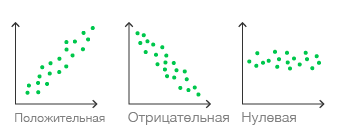

- При **положительной корреляции** увеличение одного признака приводит к увеличению другого. И наоборот.
- При **отрицательной связи** увеличение одного из признаков приводит к уменьшению другого и наоборот.
- При **нулевой корреляции** признаки распределяются независимо друг от друга, что видно на рисунке.

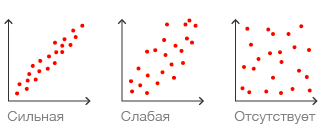

При **сильной связи** точки на графике расположены близко друг к другу. Чем связь **слабее**, тем дальше находятся точки друг от друга. На графике изображена сильная связь с коэффициентом корреляции ~0.95, слабая с коэффициентом корреляции ~0.5 и нулевая корреляция.

**ГРАФИК ПОПАРНЫХ ОТНОШЕНИЙ PAIRPLOT**

Давайте построим график PairPlot для нашего набора данных:

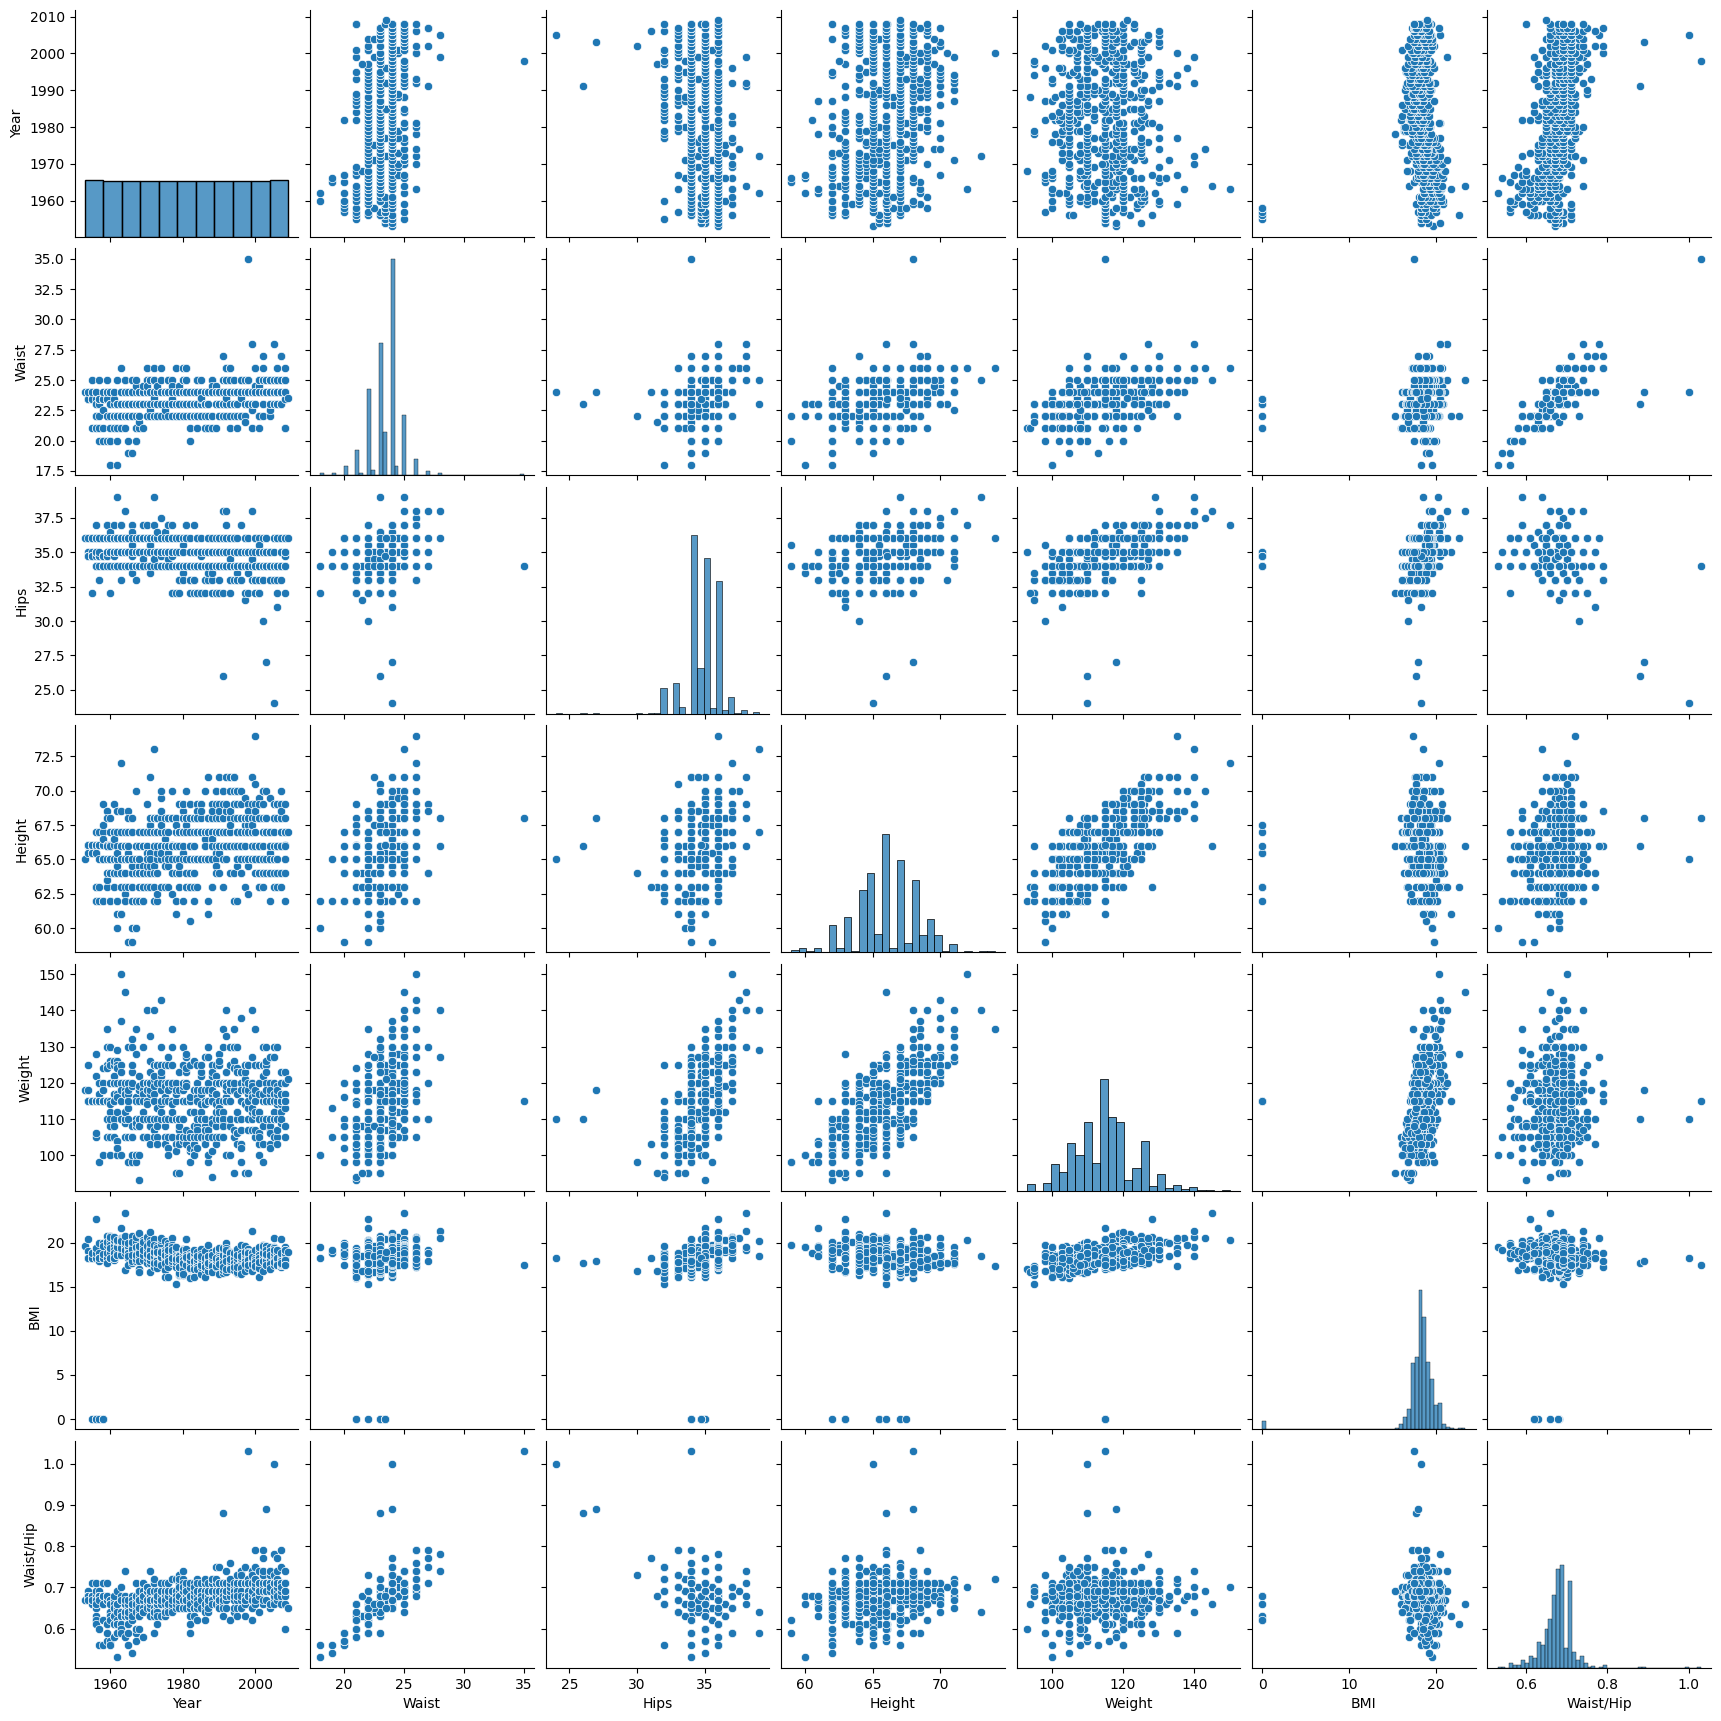

In [17]:
sns.pairplot(df)

На главной диагонали вместо единиц представлены графики-распределения конкретной величины. В остальных ячейках мы можем увидеть точечный график связей признаков между собой — это scatterplot

**Задание 6.3**

Посчитайте коэффициент корреляции между признаками *Weight* (вес модели) и *Height* (рост модели). Ответ округлите до сотых.

In [19]:
weight_height = round(df['Weight'].corr(df['Height']), 2)
weight_height

np.float64(0.71)

**Задание 7.2**

Рассчитайте среднее значение признаков при помощи библиотеки statistics для признаков weight и height. Ответ округлите до сотых.

In [23]:
print(round(statistics.mean(df['Weight']), 2))
print(round(statistics.mean(df['Height']), 2))

114.94
66.06


**Задание 7.3**

Постройте матрицы визуализации корреляций, диаграммы рассеивания, проанализируйте и выполните задание.

С увеличением обхвата бедер модели ИМТ незначительно

<Axes: xlabel='Hips', ylabel='BMI'>

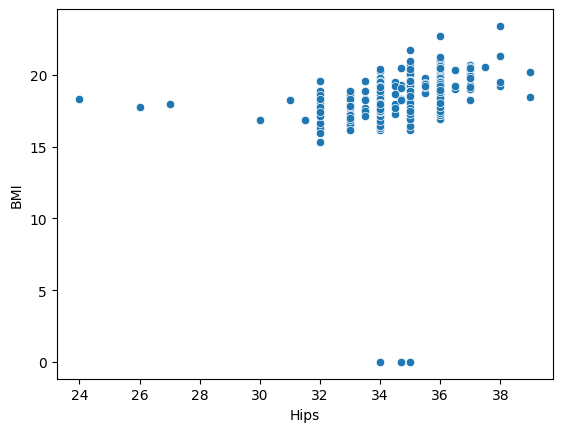

In [26]:
sns.scatterplot(
    data=df,
    x='Hips',
    y='BMI'
)

Обхват бёдер имеет _________ связь с весом модели.

<Axes: xlabel='Weight', ylabel='Hips'>

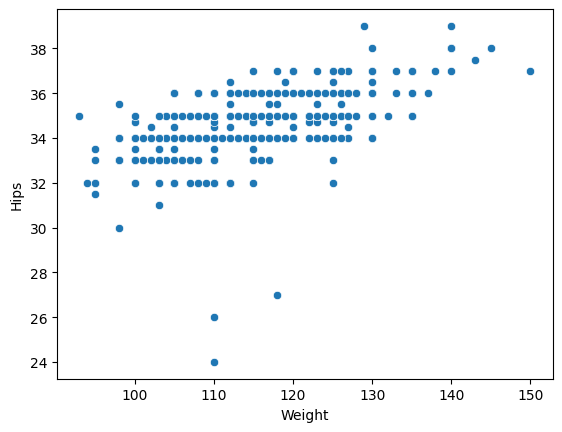

In [28]:
sns.scatterplot(
    data=df,
    x='Weight',
    y='Hips'
)

С увеличением обхвата бёдер _________ вес модели.

Год выпуска журнала и вес модели имеют __________ связь.

<Axes: xlabel='Year', ylabel='Weight'>

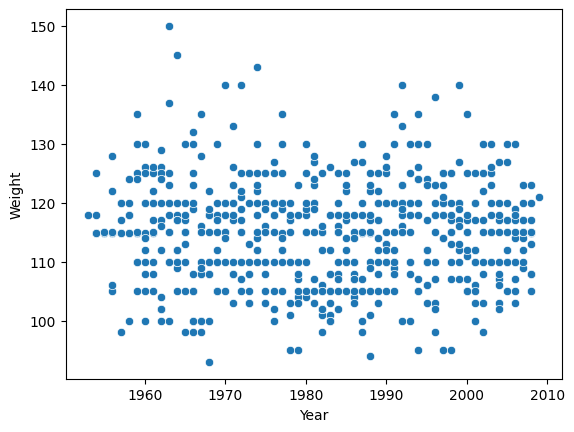

In [29]:
sns.scatterplot(
    data=df,
    x='Year', 
    y='Weight'
)